In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
# To graph the results
import matplotlib.pyplot as plt
import random
import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [32]:
# Neural Network as a class
class NN:
    
    # Constructor method
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.estimator = None 
        self.history = None
        self.__score_mse_train = None
        self.__score_mae_train = None
        self.__score_mse_test = None
        self.__score_mae_test = None
        self.__figure_name = None
        self.__y_pred = None

    
    # Destructor
    def __del__(self):
        print("The Keras Regressor Neural Network has been deleted")
        
    # Create Model
    def create_model(self,opt, loss, fun, init,epo, batch,nn):
        self.opt = opt
        self.loss = loss
        self.fun = fun
        self.init = init
        self.epo = epo
        self.batch = batch
        self.nn = nn

        
        # when X_train (input) is 1 a direct assingment is needed, otherwise there is a problem here inputs= X_train.shape[1]
        if len(self.X_train.shape) == 1:
            inputs= 1
        else: 
            inputs= self.X_train.shape[1]
    
        # Define the keras base model 
        def baseline_model():
            kerasmodel = Sequential()
            kerasmodel.add(Dense(nn[0], input_dim=inputs, kernel_initializer=init, activation=fun))
            kerasmodel.add(Dense(nn[1], kernel_initializer=init, activation=fun))
            kerasmodel.add(Dense(1,kernel_initializer=init))  
            
            # Compile model 
            kerasmodel.compile(loss=loss, optimizer= opt, metrics=['mse', 'mae'])
            return kerasmodel

        self.estimator = KerasRegressor(build_fn=baseline_model, epochs=epo, batch_size=batch, verbose=0)
        self.history = self.estimator.fit(X_train,y_train)
        
        # Prediction
        self.__y_pred = self.estimator.predict(X_test)
        
        # Quality of the NN  with train data (mae, mse)
        self.__score_mse_train = self.history.history['mse'][epo-1]
        self.__score_mae_train = self.history.history['mae'][epo-1]

         # Quality of the NN  with test data (mae, mse)
        self.__score_mse_test = mean_squared_error(y_test, self.__y_pred)
        self.__score_mae_test = mean_absolute_error(y_test, self.__y_pred)
        
        plt.plot(y_test.values, label="y original")
        plt.plot(self.__y_pred, label="y predicted")
        plt.legend()      
        self.__figure_name = 'figure_NN_{}_{}.png'.format(random.randint(100, 999), time.time() * 1000)
        plt.savefig('/Users/HP14/Documents/THKoln/Semester 1/OOP/Git/oopproject/group_1/oop_desktop/plots/{}'.format(self.__figure_name))
        plt.show()
        plt.close()
    
    def get_score_mse_train(self):
        return self.__score_mse_train

    def get_score_mae_train(self):
        return self.__score_mae_train
    
    def get_score_mse_test(self):
        return self.__score_mse_test

    def get_score_mae_test(self):
        return self.__score_mae_test
    
    def get_figure_name(self):
        return self.__figure_name

    def predict(self):
        return self.__y_pred

The Keras Regressor Neural Network has been deleted


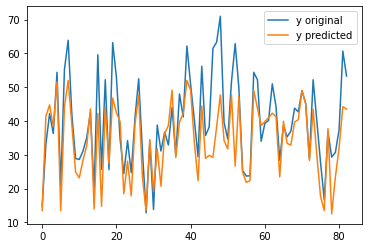

86.75544
6.046875
87.6108714846173
6.598301078612546
figure_NN_377_1618927005130.7559.png


In [33]:
seed = 10
np.random.seed(seed)

df=pd.read_excel('/Users/HP14/Documents/THKoln/Semester 1/OOP/Project/Testing/Real estate valuation data set.xlsx')

# Inputs and Outputs 
X=df.drop(columns=['Y house price of unit area', 'No','X1 transaction date',])        # inputs
y=df['Y house price of unit area']                                                    # outputs
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)
  

# optimizer to compile the model
opt='Adadelta'           # opt = ['Adadelta', 'Adagrad', 'Adam', 'Adamax', 'Nadam', 'RMSprop']

# objective function (losses)
loss = 'MAPE'            # loss = ['MAE', 'MSE', 'MAPE']

# activation function
fun='softplus'              # fun = ['relu', 'softplus', 'selu', 'elu']

# initializacion function
init='lecun_uniform'          # init = ['uniform', 'lecun_uniform', 'normal', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']  

# epochs (one forward pass and one backward pass of all the training examples) the >> the best from 1 to n of samples
epo=100                 # epo = [100, 200, 300]     (the greater, the better)  
# batch_size (the number of training examples in one forward/backward pass) the << the best (until 1)
batch = 5               # batch = [1,2,5]           (the smaller, the better)
# number of neurons in layer 1 and 2
nn = [8,4]             # nn = first value from 8 to 16 and second value from 4 to 10

nn1 = NN(X_train, X_test, y_train, y_test) # creation of the object
nn1.create_model(opt, loss, fun,init,epo, batch, nn) # creation of the model
mse_train=nn1.get_score_mse_train()
print(mse_train)
mae_train=nn1.get_score_mae_train()
print(mae_train)
mse_test=nn1.get_score_mse_test()
print(mse_test)
mae_test=nn1.get_score_mae_test()
print(mae_test)
fig=nn1.get_figure_name()
print(fig)
#pred=nn1.predict()
#print(pred)